In [140]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#@title Functions
def Initialization(a, b):
  X1 = np.array([[a],[b],[a]]); y1 = np.array([a])
  X2 = np.array([[b],[a],[b]]); y2 = np.array([b])
  X = [X1, X2]; y = [y1, y2]
  W1 = np.array([[0.1*a,0.2*b],[0.3*a,0.4*b],[0.5*a,0.4*b]])
  W2 = np.array([[a+0.15,a+0.25,a+0.35],[b+0.45,b+0.55,b+0.65]])
  W3 = np.array([[a*b+0.12,a*b+0.22],[a*b+0.32,a*b+0.42],[a*b+0.52,a*b+0.62]])
  W4 = np.array([[a-b+0.16],[a-b+0.36]])
  B1 = np.array([[float('0.'+str(a)+'1')],[float('0.'+str(b)+'2')]])
  B2 = np.array([[a+b+0.15],[a+b+0.25],[a+b+0.35]])
  B3 = np.array([[a/(b+1)+0.12],[a/(b+1)+0.22]])
  B4 = np.array([b-a+0.26])
  return X, y,  W1, B1, W2, B2, W3, B3, W4, B4

def Perceptron(X, y, W1, B1, W2, B2, W3, B3, W4, B4, eta, Epoch, Itr):
  (W1_bar, W2_bar, W3_bar, W4_bar) = (W1.T, W2.T, W3.T, W4.T)
  E = [0, 0]; error = []
  for i in range(Epoch):
    print(f'epoch ({i+1}):')
    for itr in range(Itr):
      A1, Z, A2, K, A3, P, A4, y_hat = FeedForward(X[itr], W1_bar, B1, W2_bar, B2, W3_bar, B3, W4_bar, B4)
      W1_bar, B1, W2_bar, B2, W3_bar, B3, W4_bar, B4 = BackPropagation(y[itr], X[itr], A1, Z, A2, K, A3, P, A4, y_hat, W1_bar, B1, W2_bar, B2, W3_bar, B3, W4_bar, B4, eta)
      E[itr] = 1/2 * (y[itr] - y_hat) ** 2
      print(f'\tstep {itr+1} (X{itr+1}, y{itr+1}): y_hat = {y_hat} , Error = {E[itr]}')
    error.append(np.mean(E))
  return W1_bar.T, B1, W2_bar.T, B2, W3_bar.T, B3, W4_bar.T, B4, error

def FeedForward(X, W1_bar, B1, W2_bar, B2, W3_bar, B3, W4_bar, B4):
  A1 = W1_bar @ X + B1
  Z = np.tanh(A1)
  A2 = W2_bar @ Z + B2
  K = Sigmoid(A2)
  A3 = W3_bar @ K + B3
  P = np.tanh(A3)
  A4 = W4_bar @ P + B4
  y_hat = RelU(A4)
  return A1, Z, A2, K, A3, P, A4, y_hat

def BackPropagation(y, X, A1, Z, A2, K, A3, P, A4, y_hat, W1_bar, B1, W2_bar, B2, W3_bar, B3, W4_bar, B4, eta):
  # update W4, B4
  dE_dy = y_hat - y
  dy_dA4 = A4 > 0  # Relu derivative
  B4, W4_bar, dE_dA4 = update(B4, W4_bar, dE_dy, dy_dA4, P, eta)
  # update W3, B3
  dE_dP = dE_dal_1(W4_bar , dE_dA4)
  dP_dA3 = 1 - P**2 # tanh derivative
  B3, W3_bar, dE_dA3 = update(B3, W3_bar, dE_dP, dP_dA3, K, eta)
  # update W2, B2
  dE_dK = dE_dal_1(W3_bar , dE_dA3)
  dK_dA2 = K * (1-K) # sigmoid derivative
  B2, W2_bar, dE_dA2 = update(B2, W2_bar, dE_dK, dK_dA2, Z, eta)
  # update W1, B1
  dE_dZ = dE_dal_1(W2_bar , dE_dA2)
  dZ_dA1 = 1 - Z**2 # tanh derivative
  B1, W1_bar, _ = update(B1, W1_bar, dE_dZ, dZ_dA1, X, eta)
  return W1_bar, B1, W2_bar, B2, W3_bar, B3, W4_bar, B4

def Sigmoid(x):
  return 1 / (1 + np.exp(-x))

def RelU(x):
  return x * (x > 0)

def dE_dAl(dE_da, da_dA):
  return dE_da * da_dA

def dE_dWl(dE_dA, a):
  return (dE_dA) @ a.T

def dE_dal_1(W_bar , dE_dA):
  return W_bar.T @ dE_dA 

def dE_dBl(dE_dA):
  return dE_dA

def SD(x, dx, eta):
  return x - eta * dx

def update(B, W_bar, dE_da, da_dA, a, eta):
  dE_dA = dE_dAl(dE_da, da_dA)
  dE_dB = dE_dBl(dE_dA)
  dE_dW = dE_dWl(dE_dA, a)
  B = SD(B, dE_dB, eta)
  W_bar = SD(W_bar, dE_dW, eta)
  return B, W_bar, dE_dA

In [142]:
#@title Updeated Coefficients with (X1, y1)
X, y, W1, B1, W2, B2, W3, B3, W4, B4 = Initialization(a = 9, b = 6)
W1, B1, W2, B2, W3, B3, W4, B4, error = Perceptron(X, y, W1, B1, W2, B2, W3, B3, W4, B4, eta = 0.1, Epoch = 1, Itr = 1)
print(f'\nB1_new = \n{B1}\nW1_new = \n{W1}\nB2_new = \n{B2}\nW2_new = \n{W2}\nB3_new = \n{B3}\nW3_new = \n{W3}\nB4_new = \n{B4}\nW4_new = \n{W4}\n')

epoch (1):
	step 1 (X1, y1): y_hat = [[3.78]] , Error = [[13.6242]]

B1_new = 
[[0.91]
 [0.62]]
W1_new = 
[[0.9 1.2]
 [2.7 2.4]
 [4.5 2.4]]
B2_new = 
[[15.15]
 [15.25]
 [15.35]]
W2_new = 
[[9.15 9.25 9.35]
 [6.45 6.55 6.65]]
B3_new = 
[[1.40571429]
 [1.50571429]]
W3_new = 
[[54.12 54.22]
 [54.32 54.42]
 [54.52 54.62]]
B4_new = 
[[-2.218]]
W4_new = 
[[3.682]
 [3.882]]



/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [143]:
#@title Updeated Coefficients with (X2, y2)
X, y, W1, B1, W2, B2, W3, B3, W4, B4 = Initialization(a = 9, b = 6)
W1, B1, W2, B2, W3, B3, W4, B4, error = Perceptron(X, y, W1, B1, W2, B2, W3, B3, W4, B4, eta = 0.1, Epoch = 1, Itr = 2)
print(f'\nB1_new = \n{B1}\nW1_new = \n{W1}\nB2_new = \n{B2}\nW2_new = \n{W2}\nB3_new = \n{B3}\nW3_new = \n{W3}\nB4_new = \n{B4}\nW4_new = \n{W4}\n')

epoch (1):
	step 1 (X1, y1): y_hat = [[3.78]] , Error = [[13.6242]]
	step 2 (X2, y2): y_hat = [[5.346]] , Error = [[0.213858]]

B1_new = 
[[0.91]
 [0.62]]
W1_new = 
[[0.9 1.2]
 [2.7 2.4]
 [4.5 2.4]]
B2_new = 
[[15.15]
 [15.25]
 [15.35]]
W2_new = 
[[9.15 9.25 9.35]
 [6.45 6.55 6.65]]
B3_new = 
[[1.40571429]
 [1.50571429]]
W3_new = 
[[54.12 54.22]
 [54.32 54.42]
 [54.52 54.62]]
B4_new = 
[[-2.1526]]
W4_new = 
[[3.7474]
 [3.9474]]



epoch (1):
	step 1 (X1, y1): y_hat = [[3.78]] , Error = [[13.6242]]
	step 2 (X2, y2): y_hat = [[5.346]] , Error = [[0.213858]]
epoch (2):
	step 1 (X1, y1): y_hat = [[5.5422]] , Error = [[5.97819042]]
	step 2 (X2, y2): y_hat = [[6.57954]] , Error = [[0.16793331]]
epoch (3):
	step 1 (X1, y1): y_hat = [[6.405678]] , Error = [[3.36525332]]
	step 2 (X2, y2): y_hat = [[7.1839746]] , Error = [[0.70089793]]
epoch (4):
	step 1 (X1, y1): y_hat = [[6.82878222]] , Error = [[2.35709332]]
	step 2 (X2, y2): y_hat = [[7.48014755]] , Error = [[1.09541839]]
epoch (5):
	step 1 (X1, y1): y_hat = [[7.03610329]] , Error = [[1.92844515]]
	step 2 (X2, y2): y_hat = [[7.6252723]] , Error = [[1.32075503]]
epoch (6):
	step 1 (X1, y1): y_hat = [[7.13769061]] , Error = [[1.73409813]]
	step 2 (X2, y2): y_hat = [[7.69638343]] , Error = [[1.43885837]]
epoch (7):
	step 1 (X1, y1): y_hat = [[7.1874684]] , Error = [[1.6426354]]
	step 2 (X2, y2): y_hat = [[7.73122788]] , Error = [[1.49857499]]
epoch (8):
	step 1 (X1, y1):

Text(0.5, 1.0, 'Error of MLP after updating coeficients')

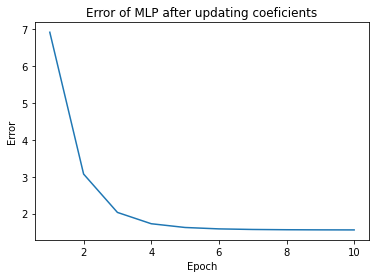

In [145]:
#@title Updeated Coefficients with (X1, y1)
X, y, W1, B1, W2, B2, W3, B3, W4, B4 = Initialization(a = 9, b = 6)
W1, B1, W2, B2, W3, B3, W4, B4, error = Perceptron(X, y, W1, B1, W2, B2, W3, B3, W4, B4, eta = 0.1, Epoch = 10, Itr = 2)
print(f'\nB1_new = \n{B1}\nW1_new = \n{W1}\nB2_new = \n{B2}\nW2_new = \n{W2}\nB3_new = \n{B3}\nW3_new = \n{W3}\nB4_new = \n{B4}\nW4_new = \n{W4}\n')
plt.plot(np.arange(10)+1, error)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error of MLP after updating coeficients')